In [1]:
# reload P1_definitions module before executing code. All the object imported from P1_definitions are updated.
%load_ext autoreload
%autoreload 2

In [2]:
# Importing various packages
import numpy as np
import matplotlib.pyplot as plt 

# For reproducibility
from random import random, seed

# For Define the model and preprocessing 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Our code for OLS, Ridge and Lasso methods and analysis
from P1_definitions import *

# For Lasso 
from sklearn import linear_model

# For bootstrap 
from sklearn.utils import resample

# For crossvalidation (k-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Short legend:                                   $\\$

OLS_ = Ordinary least squared method            $\\$
R_ = Ridge method                               $\\$
las_ = Lasso method                             $\\$
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. $\\$
_MSE_ = Mean squared error                       $\\$
_MSE_mean_ = mean of the mean squared error (with bootstrap technique) $\\$
R2_ = R-squared                                 $\\$
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. $\\$
_Bs_ = Bootstrap                                 $\\$
_Cs_ = Cross-validation                          $\\$
c_dp_ = complexity and number of data points     $\\$
c_rt_ = complexity and regularization term       $\\$
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. $\\$
_ztilde = training data predicted by the model  $\\$
_zpredict = test data predicted by the model    $\\$

******* Run the following 2 code boxes to define the problem, create the dataset, and preprocess the data. *******

In [3]:
""" Definition of the Franke function, production of the dataset and splitting the data into train and test.
    The size of the dataset is defined here, but it would actually be better to run it after analyzing the dependence of the MSE 
    on the complexity and number of data points. Such analysis is performed, using OLS regression, in the second code below. """

n_datapoints = 25       # Dimention of the dataset : (n_datapoints x n_datapoints) points.
x,y = xy_data_equally(n_datapoints)
x_y = np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))   # Matrix with x in the fisrt column and y in the second one

z = FrankeFunction(x, y)  
coeff_noise = 0.05
z_noise = FrankeFunction_noise(x,y,coeff_noise)
z_noise_plot = z_noise
z_noise = z_noise.ravel()   # From matrix (n,n) to tuple (n*n,)

# Splitting the data into train and test
""" the test size is the percentage of data we use as testing, in this case it's 20%
    random_stateint = controls the shuffling applied to the data before applying the split. Pass an int for reproducible output 
                     across multiple function calls. See Glossary.
    shufflebool = whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None."""
x_y_train, x_y_test, z_train, z_test = train_test_split(x_y, z_noise.reshape(z_noise.shape[0],1), test_size=0.2, random_state=42, shuffle=True)

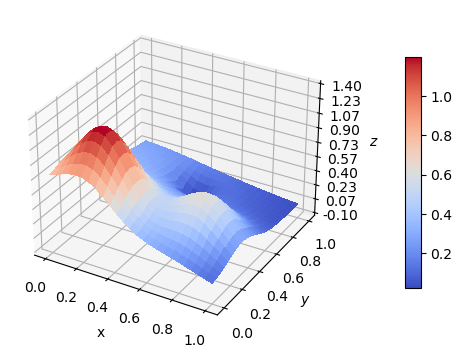

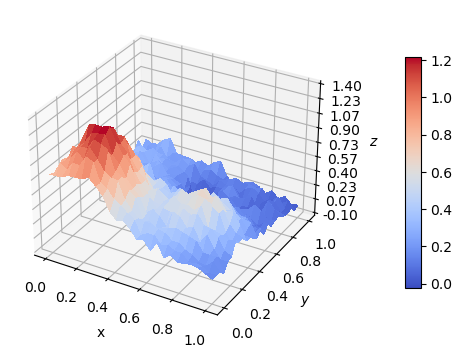

In [4]:
""" Plot of the function with and without noise """
# Plotting the Franke function and the Franke function plus noise 
plot3Dfunction(x,y,z)  

plot3Dfunction(x,y,z_noise_plot)

1) OLS analysis: MSE (train and test) error analysis with respect to the complexity of the model and the number of data points. The complexity of the model is given by the degree of the polynomial

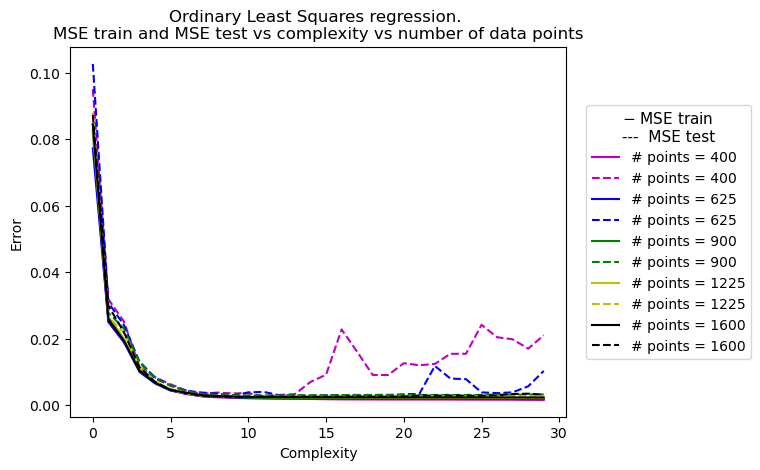

In [9]:
""" Ordinary Least Square (OLS) analysis: MSE error analysis with respect to the complexity of the model and the number of data points. 
                                          maxdegree is used to analyze the role of model complexity
                                          n_max is used to analyze the role of the number of data point """
# Hyperparameter initialization
case = 'OLS'
c_dp_OLS_maxdegree = 30      # Polynomial maxdegree
c_dp_OLS_n_max = 40          # Max Dimention of the dataset : (c_dp_OLS_n_max x c_dp_OLS_n_max) points.
c_dp_OLS_n_iterations = 5    # Number of sets with different number of data points. max = 6
c_dp_OLS_n = np.linspace(20, c_dp_OLS_n_max, num = c_dp_OLS_n_iterations, dtype= int)

c_dp_OLS_MSE_train = np.zeros((c_dp_OLS_maxdegree, c_dp_OLS_n_iterations))
c_dp_OLS_MSE_test = np.zeros((c_dp_OLS_maxdegree, c_dp_OLS_n_iterations))
c_dp_OLS_polydegree = np.zeros(c_dp_OLS_maxdegree)

# Computing MSE train and test
for j, n in enumerate(c_dp_OLS_n):
    # Computing the data set
    c_dp_OLS_x,c_dp_OLS_y = xy_data_equally(n)
    c_dp_OLS_x_y = np.hstack((c_dp_OLS_x.ravel().reshape(c_dp_OLS_x.ravel().shape[0],1),c_dp_OLS_y.ravel().reshape(c_dp_OLS_y.ravel().shape[0],1)))   # Matrix with x in the fisrt column and y in the second one
    c_dp_OLS_z_noise = FrankeFunction_noise(c_dp_OLS_x,c_dp_OLS_y,coeff_noise)    # coeff_noise = 0.05
    c_dp_OLS_z_noise = c_dp_OLS_z_noise.ravel()   # From matrix (n,n) to tuple (n*n,)

    c_dp_OLS_x_y_train, c_dp_OLS_x_y_test, c_dp_OLS_z_train, c_dp_OLS_z_test = train_test_split(c_dp_OLS_x_y, c_dp_OLS_z_noise.reshape(c_dp_OLS_z_noise.shape[0],1), test_size=0.2, random_state=42, shuffle=True)
    
    for i in range(c_dp_OLS_maxdegree):
        # Computing training and test design matrices
        c_dp_OLS_design_matrix_train = Design_Matrix_calc(i, c_dp_OLS_x_y_train)
        c_dp_OLS_design_matrix_test = Design_Matrix_calc(i, c_dp_OLS_x_y_test)
        # Scaling the data with respect to the training data 
        scaled_c_dp_OLS_design_matrix_train, scaled_c_dp_OLS_design_matrix_test = data_scaling(c_dp_OLS_design_matrix_train, c_dp_OLS_design_matrix_test)
        c_dp_OLS_beta= beta_calc(scaled_c_dp_OLS_design_matrix_train, c_dp_OLS_z_train)
        # Calculation of MSE of both training and test data sets
        c_dp_OLS_ztilde= scaled_c_dp_OLS_design_matrix_train @ c_dp_OLS_beta
        c_dp_OLS_zpredict = scaled_c_dp_OLS_design_matrix_test @ c_dp_OLS_beta
        c_dp_OLS_MSE_train[i,j] = MSE_function(c_dp_OLS_z_train, c_dp_OLS_ztilde, 'scalar')
        c_dp_OLS_MSE_test[i,j] = MSE_function(c_dp_OLS_z_test, c_dp_OLS_zpredict, 'scalar')
        c_dp_OLS_polydegree[i] = i


# Plot MSE train and MSE test vs complexity and number of datapoint
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-', 'c-'], ['m--' , 'b--', 'g--', 'y--', 'k--', 'c--']))
for i in range(c_dp_OLS_n_iterations):
    plt.plot(c_dp_OLS_polydegree, c_dp_OLS_MSE_train[:,i], color[0,i], label='# points = {}'.format(c_dp_OLS_n[i] * c_dp_OLS_n[i]))
    plt.plot(c_dp_OLS_polydegree, c_dp_OLS_MSE_test[:,i], color[1,i], label='# points = {}'.format(c_dp_OLS_n[i] * c_dp_OLS_n[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ordinary Least Squares regression. \n' + 'MSE train and MSE test vs complexity vs number of data points')
# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title=r'$-$ MSE train' + '\n' + '---  MSE test')
plt.show()

# time: 3.7s

2) OLS analysis: MSE error and R-squared (train and test) analysis with respect to the complexity of the model. Now the number of data points is fixed.


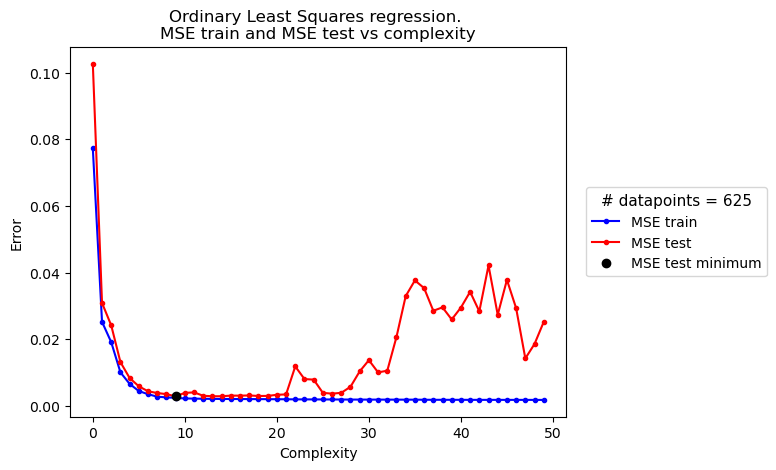

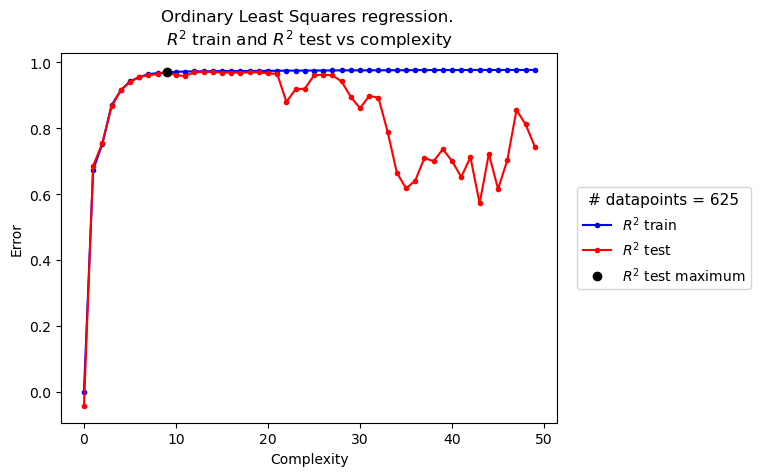

With 625 datapoints, the smallest mean squared error is 2.8695e-03 and it is obtained with the model with polynomial degree = 9,
while the greater R-squared score is 9.7084e-01 and it is obtained with the model with polynomial degree = 9.


In [10]:
""" Ordinary Least Square (OLS) analysis:
        MSE error and R-squared analysis with respect to the complexity of the model """

# Hyperparameter initialization 
case = 'OLS'
OLS_maxdegree = 50      # polynomial maxdegree
OLS_polydegree = np.zeros(OLS_maxdegree)    # array of polynomial degree
OLS_MSE_train = np.zeros(OLS_maxdegree)
OLS_MSE_test = np.zeros(OLS_maxdegree)
OLS_R2_train = np.zeros(OLS_maxdegree)
OLS_R2_test = np.zeros(OLS_maxdegree)

for i in range(OLS_maxdegree):
    # Computing training and test design matrices
    OLS_design_matrix_train = Design_Matrix_calc(i, x_y_train) 
    OLS_design_matrix_test = Design_Matrix_calc(i, x_y_test)

    # Scaling the data with respect to the training data
    scaled_OLS_design_matrix_train, scaled_OLS_design_matrix_test = data_scaling(OLS_design_matrix_train, OLS_design_matrix_test)
    OLS_beta= beta_calc(scaled_OLS_design_matrix_train, z_train)
    
    # Calculation of MSE and R2 of both training and test data sets
    OLS_ztilde= scaled_OLS_design_matrix_train @ OLS_beta
    OLS_zpredict = scaled_OLS_design_matrix_test @ OLS_beta
    OLS_MSE_train[i] = MSE_function(z_train, OLS_ztilde, 'scalar')
    OLS_MSE_test[i] = MSE_function(z_test, OLS_zpredict, 'scalar')
    OLS_R2_train[i] = R2_function(z_train, OLS_ztilde, 'scalar')
    OLS_R2_test[i] = R2_function(z_test, OLS_zpredict, 'scalar')
    OLS_polydegree[i] = i 

# Seeking for the smallest test MSE
OLS_MSE_min = np.min(OLS_MSE_test)
OLS_MSE_min_position = np.where(OLS_MSE_test == OLS_MSE_test.min())[0]

# Seeking for the greater test R2
OLS_R2_max = np.max(OLS_R2_test)
OLS_R2_max_position = np.where(OLS_R2_test == OLS_R2_test.max())[0]

# Plot MSE error train and test
plt.figure(1)
plt.plot(OLS_polydegree, OLS_MSE_train, 'b-o', markersize = 3., label='MSE train')
plt.plot(OLS_polydegree, OLS_MSE_test, 'r-o', markersize = 3., label='MSE test')
plt.plot(OLS_MSE_min_position, OLS_MSE_min, 'ko', label='MSE test minimum', linewidth = 3)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {}'.format(n_datapoints * n_datapoints))
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ordinary Least Squares regression. \n' + 'MSE train and MSE test vs complexity')
plt.show()

# Plot R-squared error train and test
plt.figure(2)
plt.plot(OLS_polydegree, OLS_R2_train, 'b-o', markersize = 3., label=r'$R^2$ train')
plt.plot(OLS_polydegree, OLS_R2_test, 'r-o', markersize = 3., label=r'$R^2$ test')
plt.plot(OLS_R2_max_position, OLS_R2_max, 'ko', label=r'$R^2$ test maximum', linewidth = 3)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {}'.format(n_datapoints * n_datapoints))
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ordinary Least Squares regression. \n' + r'$R^2$ train and $R^2$ test vs complexity')
plt.show()

print('With {} datapoints, the smallest mean squared error is {:.4e} and it is obtained with the model with polynomial degree = {},'.format(n_datapoints*n_datapoints, OLS_MSE_min, OLS_MSE_min_position[0]))
print('while the greater R-squared score is {:.4e} and it is obtained with the model with polynomial degree = {}.'.format(OLS_R2_max, OLS_R2_max_position[0]))

# time: 8.8s

3) OLS analysis. Bootstrap and Bias-variance tradeoff with respect to the complexity of the model and the number of data point.

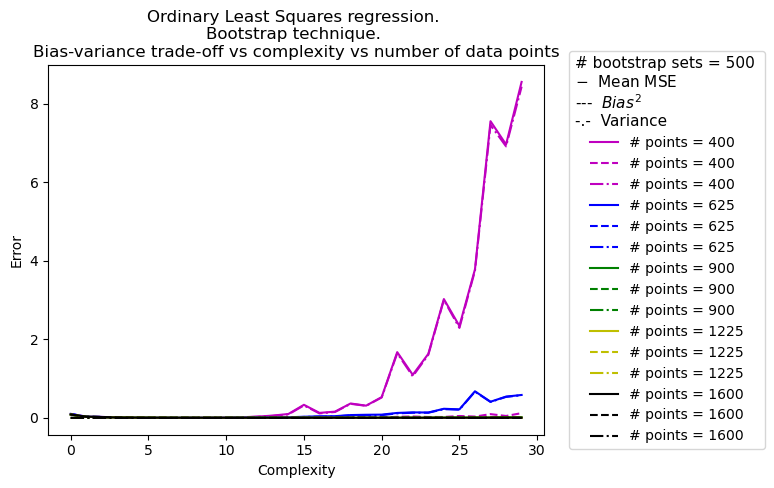

In [16]:
""" OLS analysis. Bootstrap and Bias-variance tradeoff vs complexity vs number of data point """

# Hyperparameter initialization
case = 'OLS'
c_dp_OLS_n_boostraps = 500         # number of bootstrap sets (usually a large number, "almost infinite" to make the method converge)
c_dp_OLS_Bs_maxdegree = 30   
c_dp_OLS_Bs_n_max = 40                        
c_dp_OLS_Bs_n_iterations = 5       # Number of sets with different number of data points
c_dp_OLS_Bs_n = np.linspace(20, c_dp_OLS_Bs_n_max, num = c_dp_OLS_Bs_n_iterations, dtype= int) 

c_dp_OLS_bias = np.zeros((c_dp_OLS_Bs_maxdegree,c_dp_OLS_Bs_n_iterations))
c_dp_OLS_variance = np.zeros((c_dp_OLS_Bs_maxdegree,c_dp_OLS_Bs_n_iterations))
c_dp_OLS_MSE_mean = np.zeros((c_dp_OLS_Bs_maxdegree,c_dp_OLS_Bs_n_iterations))
c_dp_OLS_Bs_polydegree = np.zeros(c_dp_OLS_Bs_maxdegree)

# Computing MSE train and test
for j, n in enumerate(c_dp_OLS_Bs_n):
    # Computing the data set
    c_dp_OLS_Bs_x,c_dp_OLS_Bs_y = xy_data_equally(n)
    c_dp_OLS_Bs_x_y = np.hstack((c_dp_OLS_Bs_x.ravel().reshape(c_dp_OLS_Bs_x.ravel().shape[0],1),c_dp_OLS_Bs_y.ravel().reshape(c_dp_OLS_Bs_y.ravel().shape[0],1)))   # Matrix with x in the fisrt column and y in the second one
    c_dp_OLS_Bs_z_noise = FrankeFunction_noise(c_dp_OLS_Bs_x,c_dp_OLS_Bs_y,coeff_noise)    # coeff_noise = 0.05
    c_dp_OLS_Bs_z_noise = c_dp_OLS_Bs_z_noise.ravel()   # From matrix (n,n) to tuple (n*n,)
    # Splitting the data into train and test
    c_dp_OLS_Bs_x_y_train, c_dp_OLS_Bs_x_y_test, c_dp_OLS_Bs_z_train, c_dp_OLS_Bs_z_test = train_test_split(c_dp_OLS_Bs_x_y, c_dp_OLS_Bs_z_noise.reshape(c_dp_OLS_Bs_z_noise.shape[0],1), test_size=0.2, random_state=42, shuffle=True)
    
    for i in range(c_dp_OLS_Bs_maxdegree):
        # function scaled_bootstrap() scales the features, function bootstrap() does not scale the features.
        c_dp_OLS_MSE_mean[i,j], c_dp_OLS_Bs_z_pred = bootstrap_scaled(c_dp_OLS_n_boostraps, i, c_dp_OLS_Bs_x_y_train, c_dp_OLS_Bs_z_train, c_dp_OLS_Bs_x_y_test, c_dp_OLS_Bs_z_test, 'OLS', 0)
        c_dp_OLS_bias[i,j] = np.mean( (c_dp_OLS_Bs_z_test - np.mean(c_dp_OLS_Bs_z_pred, axis=1, keepdims=True))**2 )
        c_dp_OLS_variance[i,j] = np.mean( np.var(c_dp_OLS_Bs_z_pred, axis=1, keepdims=True) )
        c_dp_OLS_Bs_polydegree[i] = i


# Plot mean MSE, bias^2 and variance 
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-'], ['m--' , 'b--', 'g--', 'y--', 'k--'], ['m-.' , 'b-.', 'g-.', 'y-.', 'k-.']))
for i in range(c_dp_OLS_Bs_n_iterations):
    plt.plot(c_dp_OLS_Bs_polydegree, c_dp_OLS_MSE_mean[:,i], color[0,i], label='# points = {}'.format(c_dp_OLS_Bs_n[i] * c_dp_OLS_Bs_n[i]))
    plt.plot(c_dp_OLS_Bs_polydegree, c_dp_OLS_bias[:,i], color[1,i], label='# points = {}'.format(c_dp_OLS_Bs_n[i] * c_dp_OLS_Bs_n[i]))
    plt.plot(c_dp_OLS_Bs_polydegree, c_dp_OLS_variance[:,i], color[2,i], label='# points = {}'.format(c_dp_OLS_Bs_n[i] * c_dp_OLS_Bs_n[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ordinary Least Squares regression. \n' + 'Bootstrap technique. \n' + 'Bias-variance trade-off vs complexity vs number of data points')
# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# bootstrap sets = {} \n'.format(c_dp_OLS_n_boostraps) + r'$-$  Mean MSE' + '\n' + r'---  $Bias^2$' + '\n' + '-.-  Variance ')
plt.show()

# time: 23m 31.3 s


4)OLS analysis: BOOTSTRAP and Bias-variance tradeoff with respect the complexity of the model. Now the number of data points is fixed.


********************** Model complexity: polynomial of degree 0 **********************
Error:1.029084e-01
Bias^2:1.027647e-01
Var:1.437064e-04
1.029084e-01 >= 1.027647e-01 + 1.437064e-04 = 1.029084e-01
********************** Model complexity: polynomial of degree 1 **********************
Error:3.095354e-02
Bias^2:3.079227e-02
Var:1.612718e-04
3.095354e-02 >= 3.079227e-02 + 1.612718e-04 = 3.095354e-02
********************** Model complexity: polynomial of degree 2 **********************
Error:2.437128e-02
Bias^2:2.413989e-02
Var:2.313947e-04
2.437128e-02 >= 2.413989e-02 + 2.313947e-04 = 2.437128e-02
********************** Model complexity: polynomial of degree 3 **********************
Error:1.334537e-02
Bias^2:1.311744e-02
Var:2.279310e-04
1.334537e-02 >= 1.311744e-02 + 2.279310e-04 = 1.334537e-02
********************** Model complexity: polynomial of degree 4 **********************
Error:8.574689e-03
Bias^2:8.323250e-03
Var:2.514391e-04
8.574689e-03 >= 8.323250e-03 + 2.514391e-04 = 8.5

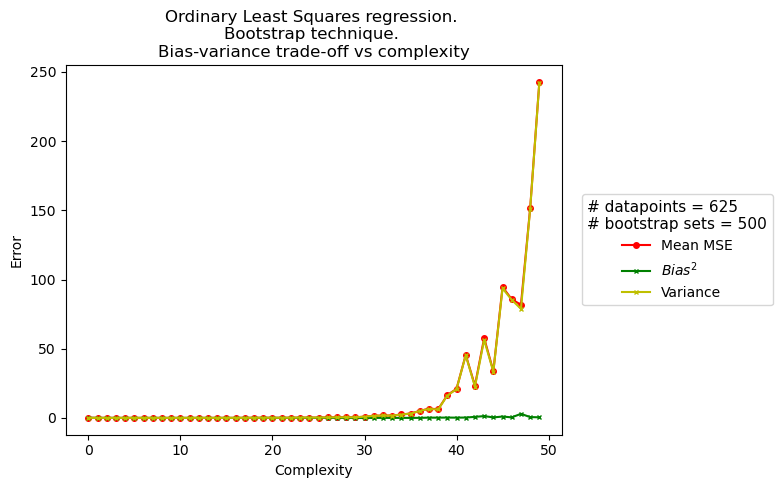

In [17]:
""" OLS analysis. BOOTSTRAP and Bias-variance tradeoff with respect the complexity of the model"""

# Hyperparameter initialization
case = 'OLS'
OLS_n_boostraps = 500       # number of bootstrap sets (usually a large number, "almost infinite" to make the method converge)
OLS_Bs_maxdegree = 50

OLS_bias = np.zeros(OLS_Bs_maxdegree)
OLS_variance = np.zeros(OLS_Bs_maxdegree)
OLS_MSE_mean = np.zeros(OLS_Bs_maxdegree)
OLS_Bs_polydegree = np.zeros(OLS_Bs_maxdegree)


# Computing MSE train and test
for j in range(OLS_Bs_maxdegree):
    # function scaled_bootstrap() scales the features, function bootstrap() does not scale the features.
    OLS_MSE_mean[j], OLS_Bs_z_pred = bootstrap_scaled(OLS_n_boostraps, j, x_y_train, z_train, x_y_test, z_test, 'OLS', 0)
    OLS_bias[j] = np.mean( (z_test - np.mean(OLS_Bs_z_pred, axis=1, keepdims=True))**2 )
    OLS_variance[j] = np.mean( np.var(OLS_Bs_z_pred, axis=1, keepdims=True) )
    OLS_Bs_polydegree[j] = j

    print('********************** Model complexity: polynomial of degree {} **********************'.format(j))
    print('Error:{:e}'.format(OLS_MSE_mean[j]))
    print('Bias^2:{:e}'.format(OLS_bias[j]))
    print('Var:{:e}'.format(OLS_variance[j]))
    print('{:e} >= {:e} + {:e} = {:e}'.format(OLS_MSE_mean[j], OLS_bias[j], OLS_variance[j], OLS_bias[j]+OLS_variance[j]))

# Note: The use of keepdims=True is important in the calculation of bias as this maintains the column vector form. Dropping this yields very unexpected results.

plt.plot(OLS_Bs_polydegree, OLS_MSE_mean, 'r-o', markersize = 4., label='Mean MSE')
plt.plot(OLS_Bs_polydegree, OLS_bias, 'g-x', markersize = 3., label=r'$Bias^2$')
plt.plot(OLS_Bs_polydegree, OLS_variance, 'y-x', markersize = 3., label='Variance')
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ordinary Least Squares regression. \n' + 'Bootstrap technique. \n' + 'Bias-variance trade-off vs complexity')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n'.format(n_datapoints * n_datapoints)  + '# bootstrap sets = {}'.format(OLS_n_boostraps))
plt.show()

# time:  64m 32.7s

5) OLS analysis: Cross-validation and Bias-variance tradeoff. MSE error with respect the complexity of the model and thenumber of data points

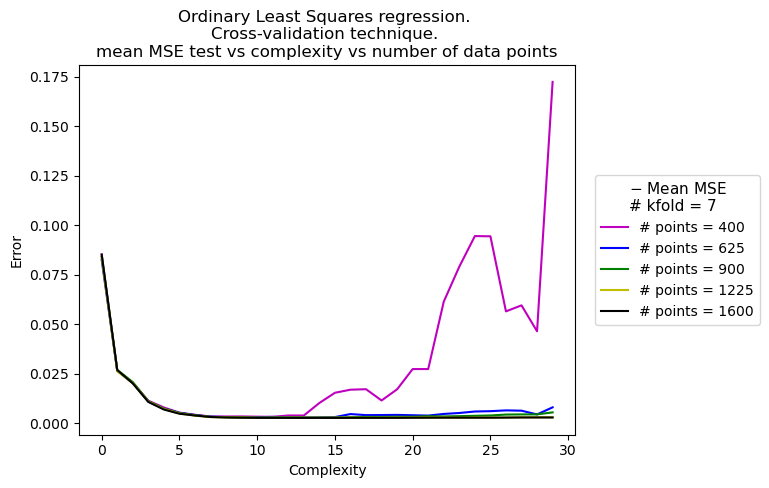

In [18]:
""" OLS analysis: Cross-validation and Bias-variance tradeoff. 
                  MSE error vs complexity vs number of data points """

# Hyperparameter initialization
case = 'OLS'
c_dp_OLS_Cs_maxdegree = 30 
c_dp_OLS_Cs_n_max = 40                        
c_dp_OLS_Cs_n_iterations = 5                    # Number of sets with different number of data points. Max number = 5.
c_dp_OLS_Cs_n = np.linspace(20, c_dp_OLS_Cs_n_max, num = c_dp_OLS_Cs_n_iterations, dtype= int)              
# Initialize a KFold instance, choose k in [5,10]
c_dp_OLS_k = 7
c_dp_OLS_kfold = KFold(n_splits = c_dp_OLS_k, shuffle=True, random_state= 42)             # shuffle decreases the mean square error

c_dp_OLS_KFold_MSE = np.zeros((c_dp_OLS_Cs_maxdegree, c_dp_OLS_Cs_n_iterations))
c_dp_OLS_Cs_polydegree = np.zeros(c_dp_OLS_Cs_maxdegree)

for j, n in enumerate(c_dp_OLS_Cs_n):
    # Computing the data set
    c_dp_OLS_Cs_x,c_dp_OLS_Cs_y = xy_data_equally(n)
    c_dp_OLS_Cs_x_y = np.hstack((c_dp_OLS_Cs_x.ravel().reshape(c_dp_OLS_Cs_x.ravel().shape[0],1),c_dp_OLS_Cs_y.ravel().reshape(c_dp_OLS_Cs_y.ravel().shape[0],1)))   # Matrix with x in the fisrt column and y in the second one
    c_dp_OLS_Cs_z_noise = FrankeFunction_noise(c_dp_OLS_Cs_x,c_dp_OLS_Cs_y,coeff_noise)    # coeff_noise = 0.05
    c_dp_OLS_Cs_z_noise = c_dp_OLS_Cs_z_noise.ravel()   # From matrix (n,n) to tuple (n*n,)

    for i in range(c_dp_OLS_Cs_maxdegree):
        # Perform the cross-validation to estimate MSE. Function scaled_validation_scaled() scales the features, function validation_scaled() does not scale the features.
        c_dp_OLS_KFold_MSE[i,j] = cross_validation_scaled(c_dp_OLS_kfold, c_dp_OLS_k, c_dp_OLS_Cs_x_y, c_dp_OLS_Cs_z_noise, i, 'OLS', 0)
        c_dp_OLS_Cs_polydegree[i] = i


# Plot mean MSE error test vs complexity vs number of data points
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-']))

for i in range(c_dp_OLS_Cs_n_iterations):
    plt.plot(c_dp_OLS_Cs_polydegree, c_dp_OLS_KFold_MSE[:,i], color[i], label='# points = {}'.format(c_dp_OLS_Cs_n[i] * c_dp_OLS_Cs_n[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ordinary Least Squares regression. \n' +  'Cross-validation technique. \n' + 'mean MSE test vs complexity vs number of data points')
# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title=r'$-$ Mean MSE' + '\n' + '# kfold = {}'.format(c_dp_OLS_k))
plt.show()

# time: 21.7s

5) OLS analysis: Cross-validation and Bias-variance tradeoff with respect the complexity of the model. Now the number of data points is fixed.

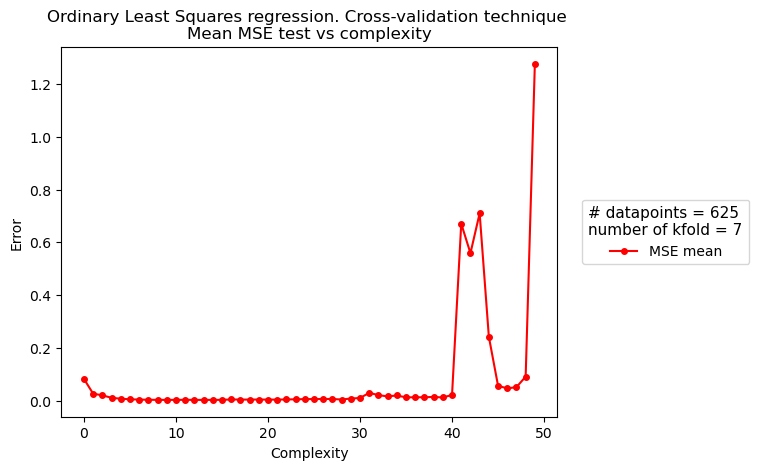

In [19]:
""" OLS analysis. Cross-validation and Bias-variance tradeoff """

# Hyperparameter initialization
case = 'OLS'
OLS_Cs_maxdegree = 50              
OLS_Cs_polydegree = np.zeros(OLS_Cs_maxdegree)
# Initialize a KFold instance, choose k in [5,10]
OLS_k = 7
OLS_kfold = KFold(n_splits = OLS_k, shuffle=True, random_state= 42)             # shuffle decreases the mean square error

OLS_KFold_MSE = np.zeros(OLS_Cs_maxdegree)

for j in range(OLS_Cs_maxdegree):
    # Perform the cross-validation to estimate MSE. Function scaled_validation_scaled() scales the features, function validation_scaled() does not scale the features.
    OLS_KFold_MSE[j] = cross_validation_scaled(OLS_kfold, OLS_k, x_y, z_noise, j, 'OLS', 0)
    OLS_Cs_polydegree[j] = j

# Plot mean MSE error test
plt.plot(OLS_Cs_polydegree, OLS_KFold_MSE, 'r-o', markersize = 4., label='MSE mean')
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ordinary Least Squares regression. Cross-validation technique \n' + 'Mean MSE test vs complexity')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n'.format(n_datapoints * n_datapoints) + 'number of kfold = {}'.format(OLS_k))
plt.show()

# time: 55.7s

6) OLS analysis: comparing bootstrap MSE and cross-validation MSE.

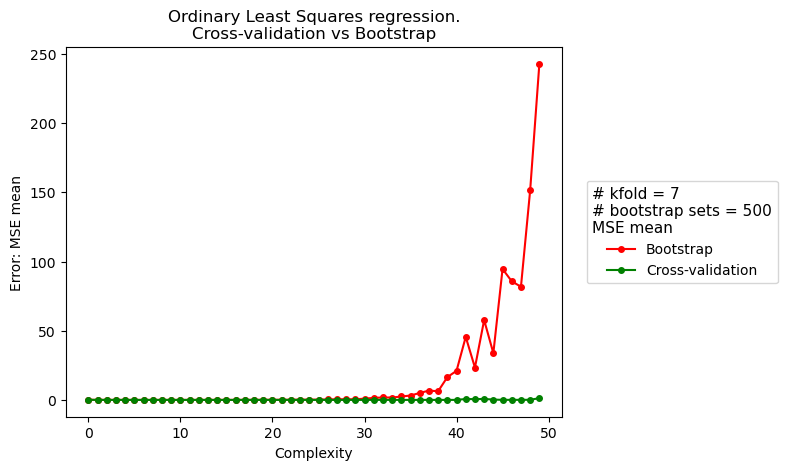

In [21]:
""" Comparing bootstrap MSE and cross-validation MSE """

plt.plot(OLS_Bs_polydegree, OLS_MSE_mean, 'r-o', markersize = 4., label='Bootstrap')
plt.plot(OLS_Cs_polydegree, OLS_KFold_MSE, 'g-o', markersize = 4., label='Cross-validation')
plt.xlabel("Complexity")
plt.ylabel("Error: MSE mean")
plt.title('Ordinary Least Squares regression.\n' + 'Cross-validation vs Bootstrap' )
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# kfold = {} \n'.format(OLS_k) + '# bootstrap sets = {}\n'.format(OLS_n_boostraps) + 'MSE mean')
plt.show()

*********************************************** RIDGE ANALYSIS ***********************************************

1) RIDGE analysis: MSE (train and test) error and R-squared analysis with respect to the complexity of the model and regularization term.

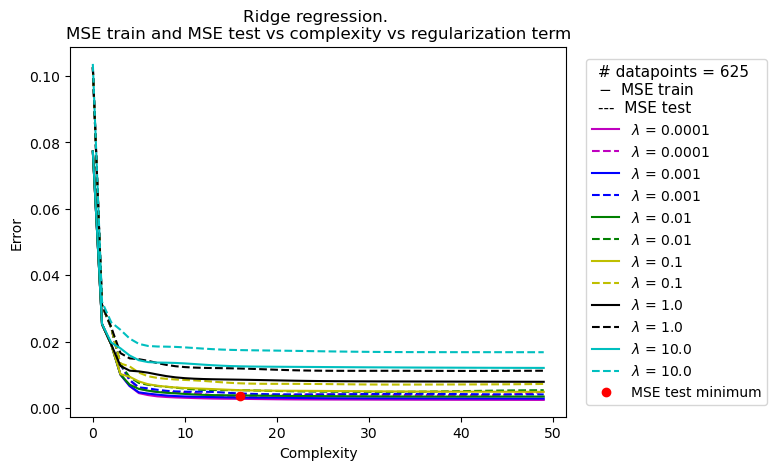

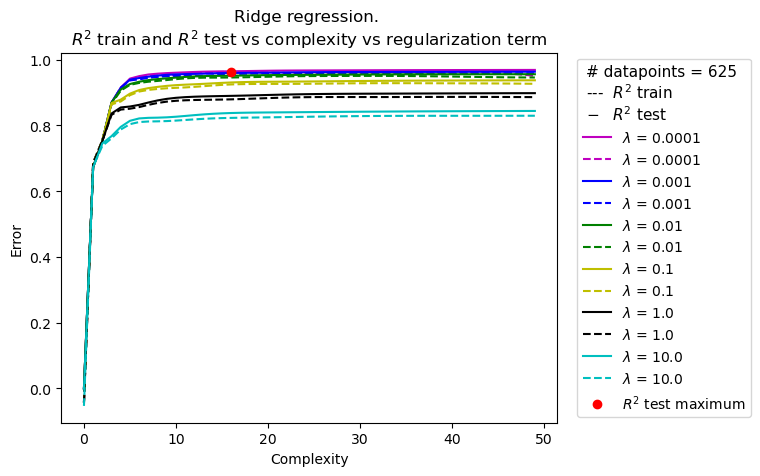

With 625 datapoints, the smallest mean squared error (test) is 3.6338e-03 and it is obtained with the model with polynomial degree = 16 and regularization term lambda = 1.0000e-04,
while the greatest R-squared is 9.6308e-01 and it is obtained with the model with polynomial degree = 16 and regularization term lambda = 1.0000e-04.



In [22]:
""" RIDGE analysis: MSE error and R-squared analysis with respect to the complexity of the model and regularization term
                    maxdegree is used to analyze the role of model complexity
                    lmb is used to analyze the role of the regularization term """

# Hyperparameter initialization
case = 'ridge'
c_rt_R_maxdegree = 50       # Polynomial maxdegree
c_rt_R_nlmbs = 6
c_rt_R_lmb = np.logspace(-4, 1, c_rt_R_nlmbs)       # Array of regularization terms

c_rt_R_MSE_train = np.zeros((c_rt_R_maxdegree, c_rt_R_nlmbs))
c_rt_R_MSE_test = np.zeros((c_rt_R_maxdegree, c_rt_R_nlmbs))
c_rt_R_R2_train = np.zeros((c_rt_R_maxdegree, c_rt_R_nlmbs))
c_rt_R_R2_test = np.zeros((c_rt_R_maxdegree, c_rt_R_nlmbs))
c_rt_R_polydegree = np.zeros(c_rt_R_maxdegree)

for i in range(c_rt_R_maxdegree):
    c_rt_R_design_matrix_train = Design_Matrix_calc(i, x_y_train) 
    c_rt_R_design_matrix_test = Design_Matrix_calc(i, x_y_test)
    # Scaling
    scaled_c_rt_R_design_matrix_train, scaled_c_rt_R_design_matrix_test = data_scaling(c_rt_R_design_matrix_train, c_rt_R_design_matrix_test)
    for j, lmb in enumerate(c_rt_R_lmb):
        # Prediction
        c_rt_R_beta= Ridge_beta_calc(scaled_c_rt_R_design_matrix_train, z_train, lmb)
        c_rt_R_ztilde= scaled_c_rt_R_design_matrix_train @ c_rt_R_beta
        c_rt_zpredict = scaled_c_rt_R_design_matrix_test @ c_rt_R_beta
        # Calculation of MSE and R2 of both training and test data sets
        c_rt_R_MSE_train[i,j] = MSE_function(z_train, c_rt_R_ztilde, 'scalar')
        c_rt_R_MSE_test[i,j] = MSE_function(z_test, c_rt_zpredict, 'scalar')
        c_rt_R_R2_train[i,j] = R2_function(z_train, c_rt_R_ztilde, 'scalar')
        c_rt_R_R2_test[i,j] = R2_function(z_test, c_rt_zpredict, 'scalar')
    c_rt_R_polydegree[i] = i 

# Seeking for the smallest test MSE
c_rt_R_MSE_min = np.min(c_rt_R_MSE_test)
c_rt_R_MSE_min_position = np.where(c_rt_R_MSE_test == c_rt_R_MSE_test.min())

# Seeking for the greatest test R2 score
c_rt_R_R2_max = np.max(c_rt_R_R2_test)
c_rt_R_R2_max_position = np.where(c_rt_R_R2_test == c_rt_R_R2_test.max())

# Plot MSE error train and test
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-', 'c-', 'r-'], ['m--' , 'b--', 'g--', 'y--', 'k--', 'c--', 'r--']))
for i in range(len(c_rt_R_lmb)):
    plt.plot(c_rt_R_polydegree, c_rt_R_MSE_train[:,i], color[0,i], label=r'$\lambda$ = {:.3}'.format(c_rt_R_lmb[i]))
    plt.plot(c_rt_R_polydegree, c_rt_R_MSE_test[:,i], color[1,i], label=r'$\lambda$ = {:.3}'.format(c_rt_R_lmb[i]))

plt.plot(c_rt_R_MSE_min_position[0][0], c_rt_R_MSE_min, 'ro', label='MSE test minimum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ridge regression. \n' + 'MSE train and MSE test vs complexity vs regularization term')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n'.format(n_datapoints * n_datapoints) + r'$-$  MSE train' +  '\n' + '---  MSE test ')
plt.show()

# Plot R-squared error train and test
plt.figure(2)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-', 'c-', 'r-'], ['m--' , 'b--', 'g--', 'y--', 'k--', 'c--', 'r--']))
for i in range(len(c_rt_R_lmb)):
    plt.plot(c_rt_R_polydegree, c_rt_R_R2_train[:,i], color[0,i], label=r'$\lambda$ = {:.3}'.format(c_rt_R_lmb[i]))
    plt.plot(c_rt_R_polydegree, c_rt_R_R2_test[:,i], color[1,i], label=r'$\lambda$ = {:.3}'.format(c_rt_R_lmb[i]))

plt.plot(c_rt_R_R2_max_position[0][0], c_rt_R_R2_max, 'ro', label=r'$R^2$ test maximum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ridge regression. \n' + r'$R^2$ train and $R^2$ test vs complexity vs regularization term')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n'.format(n_datapoints * n_datapoints) + r'---  $R^2$ train' + '\n' + r'$ - \hspace{0.9} R^2$ test ')
plt.show()


print('With {} datapoints, the smallest mean squared error (test) is {:.4e} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {:.4e},'.format(n_datapoints*n_datapoints, c_rt_R_MSE_min, c_rt_R_MSE_min_position[0][0], c_rt_R_lmb[c_rt_R_MSE_min_position[1][0]]))
print('while the greatest R-squared is {:.4e} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {:.4e}.\n'.format(c_rt_R_R2_max, c_rt_R_R2_max_position[0][0], c_rt_R_lmb[c_rt_R_R2_max_position[1][0]]))
#print( 'The MSE error for model with polynomial degree = {} and regularization term lambda = {} is equal to MSE= {}, while R-squared = {}' .format(c_rt_R_polydegree[10], c_rt_R_lmb[c_rt_R_MSE_min_position[1][0]], c_rt_R_MSE_test[10,0], c_rt_R_R2_test[10,0]))

# time: 47.5s

2) RIDGE analysis: MSE error and R-squared analysis with respect to the regularization term. 

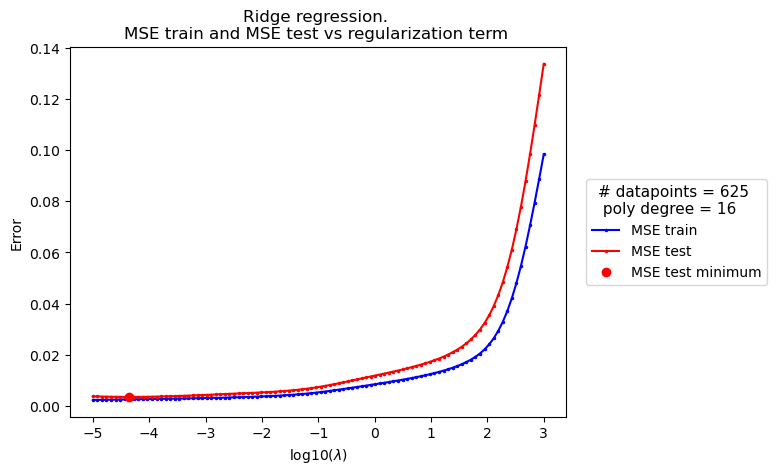

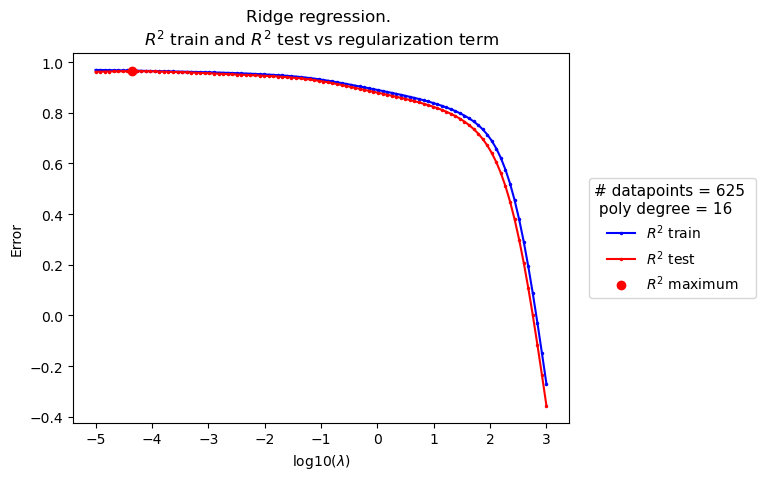

With 625 datapoints and polynomial degree = 16, the smallest mean squared error is 3.5627e-03 and it is obtained with regularization term lambda = 4.4306e-05,
while the greatest R-squared is 9.6380e-01 and it is obtained with regularization term lambda = 4.4306e-05.


In [23]:
""" RIDGE analysis: MSE error and R-squared analysis with respect to the regularization term. 
                    The degree of the polynomial (model complexity) is now fixed. """

# Hyperparameter initialization
case = 'ridge'
R_nlmbs = 100
R_degree = 16
R_lmb = np.logspace(-5, 3, R_nlmbs)

R_MSE_train = np.zeros(R_nlmbs)
R_MSE_test = np.zeros(R_nlmbs)
R_R2_train = np.zeros(R_nlmbs)
R_R2_test = np.zeros(R_nlmbs)

# Computation of the train and test design matrix
R_design_matrix_train = Design_Matrix_calc(R_degree, x_y_train)
R_design_matrix_test = Design_Matrix_calc(R_degree, x_y_test)
# Scaling
scaled_R_design_matrix_train, scaled_R_design_matrix_test = data_scaling(R_design_matrix_train, R_design_matrix_test)


for i, lmb in enumerate(R_lmb):
    # Make the prediction
    R_beta= Ridge_beta_calc(scaled_R_design_matrix_train, z_train, lmb)
    R_ztilde= scaled_R_design_matrix_train @ R_beta
    R_zpredict = scaled_R_design_matrix_test @ R_beta
    # Calculation of MSE and R2 of both training and test data sets
    R_MSE_train[i] = MSE_function(z_train, R_ztilde, 'scalar')
    R_MSE_test[i] = MSE_function(z_test, R_zpredict, 'scalar')
    R_R2_train[i] = R2_function(z_train, R_ztilde, 'scalar')
    R_R2_test[i] = R2_function(z_test, R_zpredict, 'scalar')

# Seeking for the smallest test MSE
R_MSE_min = np.min(R_MSE_test)
R_MSE_min_position = np.where(R_MSE_test == R_MSE_test.min())[0]

# Seeking for the greatest test R2 score
R_R2_max = np.max(R_R2_test)
R_R2_max_position = np.where(R_R2_test == R_R2_test.max())[0]

# Plot MSE error train and test
plt.figure(1)
plt.plot(np.log10(R_lmb), R_MSE_train, 'b-o', markersize = 1.5, label='MSE train')
plt.plot(np.log10(R_lmb), R_MSE_test, 'r-o', markersize = 1.5, label='MSE test')
plt.plot(np.log10(R_lmb[R_MSE_min_position]), R_MSE_min, 'ro', label='MSE test minimum', linewidth = 3)
plt.xlabel(r'log10($\lambda$)')
plt.ylabel("Error")
plt.title('Ridge regression. \n' + 'MSE train and MSE test vs regularization term ')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n '.format(n_datapoints * n_datapoints) + 'poly degree = {}'.format(R_degree))
plt.show()

# Plot R-squared error train and test
plt.figure(2)
plt.plot(np.log10(R_lmb), R_R2_train, 'b-o', markersize = 1.5, label=r'$R^2$ train')
plt.plot(np.log10(R_lmb), R_R2_test, 'r-o', markersize = 1.5, label=r'$R^2$ test')
plt.plot(np.log10(R_lmb[R_R2_max_position]), R_R2_max, 'ro', label=r'$R^2$ maximum', linewidth = 3)
plt.xlabel(r'log10($\lambda$)')
plt.ylabel("Error")
plt.title('Ridge regression. \n' + r'$R^2$ train and $R^2$ test vs regularization term')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n '.format(n_datapoints * n_datapoints) + 'poly degree = {}'.format(R_degree))
plt.show()


print('With {} datapoints and polynomial degree = {}, the smallest mean squared error is {:.4e} and it is obtained with regularization term lambda = {:.4e},'.format(n_datapoints*n_datapoints, R_degree, R_MSE_min, R_lmb[R_MSE_min_position][0]))
print('while the greatest R-squared is {:.4e} and it is obtained with regularization term lambda = {:.4e}.'.format(R_R2_max, R_lmb[R_R2_max_position][0]))

# time: 1.3s


3) RIDGE analysis. BOOTSTRAP and Bias-variance tradeoff with respect to the complexity of the model and the regularization parameter.

********************** Regularization parameter: lambda = 0.0001. Model complexity: polynomial of degree 0 **********************
Error:1.027106e-01
Bias^2:1.025730e-01
Var:1.375795e-04
1.027106e-01 >= 1.025730e-01 + 1.375795e-04 = 1.027106e-01
********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 0 **********************
Error:1.027776e-01
Bias^2:1.026231e-01
Var:1.544402e-04
1.027776e-01 >= 1.026231e-01 + 1.544402e-04 = 1.027776e-01
********************** Regularization parameter: lambda = 0.01. Model complexity: polynomial of degree 0 **********************
Error:1.027363e-01
Bias^2:1.025759e-01
Var:1.604590e-04
1.027363e-01 >= 1.025759e-01 + 1.604590e-04 = 1.027363e-01
********************** Regularization parameter: lambda = 0.1. Model complexity: polynomial of degree 0 **********************
Error:1.028525e-01
Bias^2:1.026958e-01
Var:1.567051e-04
1.028525e-01 >= 1.026958e-01 + 1.567051e-04 = 1.028525e-01
********************** Reg

<function matplotlib.pyplot.show(close=None, block=None)>

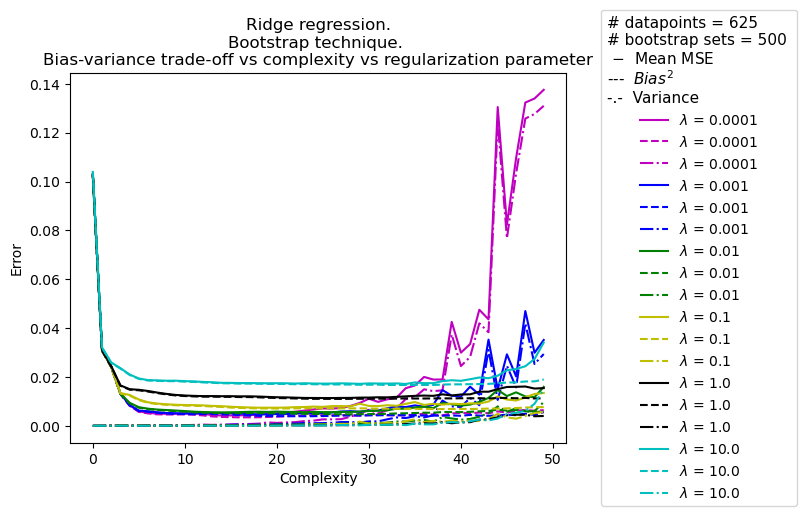

In [24]:
""" RIDGE analysis. BOOTSTRAP and Bias-variance tradeoff vs complexity and vs regularization parameter"""

# Hyperparameter initialization
case = 'ridge'
c_rt_R_n_boostraps = 500       # number of bootstrap sets (usually a large number, "almost infinite" to make the method converge)
c_rt_R_maxdegree = 50
c_rt_R_nlmbs = 6
c_rt_R_Bs_lmbs = np.logspace(-4, 1, c_rt_R_nlmbs)       # Array of regularization terms

# The following (m x n_bootstraps) matrices holds the column vectors y_pred for each bootstrap iteration.
c_rt_R_bias = np.zeros((c_rt_R_maxdegree, c_rt_R_nlmbs))
c_rt_R_variance = np.zeros((c_rt_R_maxdegree, c_rt_R_nlmbs))
c_rt_R_MSE_mean = np.zeros((c_rt_R_maxdegree, c_rt_R_nlmbs))
c_rt_R_Bs_polydegree = np.zeros(c_rt_R_maxdegree)
 

for j in range(c_rt_R_maxdegree):
    for i, lmb in enumerate(c_rt_R_Bs_lmbs):
    # Computing MSE train and test
        c_rt_R_MSE_mean[j,i], c_rt_R_z_pred =  bootstrap_scaled(c_rt_R_n_boostraps, j, x_y_train, z_train, x_y_test, z_test, 'ridge', lmb)
        c_rt_R_bias[j,i] = np.mean( (z_test - np.mean(c_rt_R_z_pred, axis=1, keepdims=True))**2 )
        c_rt_R_variance[j,i] = np.mean( np.var(c_rt_R_z_pred, axis=1, keepdims=True) )
        # Print MSE mean, Bias^2 and variance
        print('********************** Regularization parameter: lambda = {}. Model complexity: polynomial of degree {} **********************'.format(lmb, j))
        print('Error:{:e}'.format(c_rt_R_MSE_mean[j,i]))
        print('Bias^2:{:e}'.format(c_rt_R_bias[j,i]))
        print('Var:{:e}'.format(c_rt_R_variance[j,i]))
        print('{:e} >= {:e} + {:e} = {:e}'.format(c_rt_R_MSE_mean[j,i], c_rt_R_bias[j,i], c_rt_R_variance[j,i], c_rt_R_bias[j,i]+c_rt_R_variance[j,i]))
    c_rt_R_Bs_polydegree[j] = j


# Plot mean MSE, bias^2 and variance 
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-', 'c-'], ['m--' , 'b--', 'g--', 'y--', 'k--', 'c--'], ['m-.' , 'b-.', 'g-.', 'y-.', 'k-.', 'c-.']))
for i in range(c_rt_R_nlmbs):
    plt.plot(c_rt_R_Bs_polydegree, c_rt_R_MSE_mean[:,i], color[0,i], label=r'$\lambda$ = {:.3}'.format(c_rt_R_Bs_lmbs[i]))
    plt.plot(c_rt_R_Bs_polydegree, c_rt_R_bias[:,i], color[1,i], label=r'$\lambda$ = {:.3}'.format(c_rt_R_Bs_lmbs[i]))
    plt.plot(c_rt_R_Bs_polydegree, c_rt_R_variance[:,i], color[2,i], label=r'$\lambda$ = {:.3}'.format(c_rt_R_Bs_lmbs[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ridge regression.\n' + 'Bootstrap technique. \n' + 'Bias-variance trade-off vs complexity vs regularization parameter')
plt.legend(bbox_to_anchor=(1.07, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title= '# datapoints = {} \n'.format(n_datapoints * n_datapoints) + '# bootstrap sets = {} \n '.format(c_rt_R_n_boostraps) + r'$-$  Mean MSE' + '\n' + r'---  $Bias^2$' +  '\n' + '-.-  Variance ')
plt.show

# time: 400m 14.1s

4) RIDGE analysis: Cross-validation and Bias-variance tradeoff. MSE error with respect to the complexity of the model and the regularization term.

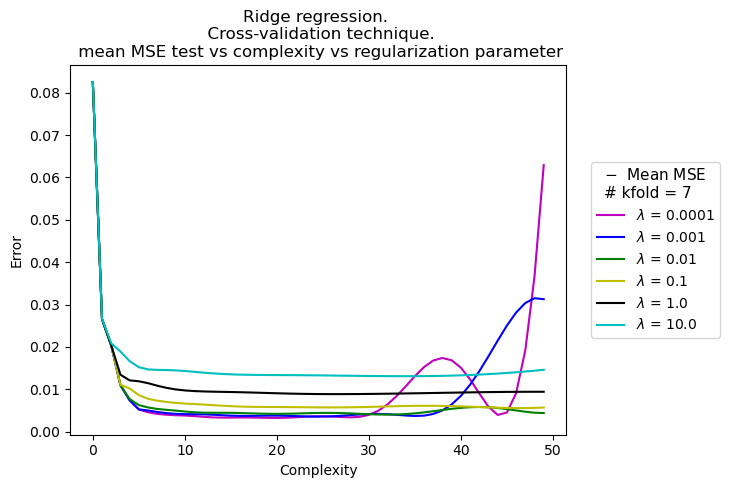

In [25]:
""" RIDGE analysis: Cross-validation and Bias-variance tradeoff.
                    MSE error vs complexity vs regularization term """

# Hyperparameter initialization
case = 'ridge'
c_rt_R_Cs_maxdegree = 50        
c_rt_R_Cs_nlmbs = 6
c_rt_R_Cs_lmbs = np.logspace(-4, 1, c_rt_R_nlmbs)       # Array of regularization terms
# Initialize a KFold instance, choose k in [5,10]
c_rt_R_k = 7
c_rt_R_kfold = KFold(n_splits = c_rt_R_k, shuffle=True, random_state= 42)  # shuffle decreases the mean square error

c_rt_R_KFold_MSE = np.zeros((c_rt_R_Cs_maxdegree, c_rt_R_Cs_nlmbs))
c_rt_R_Cs_polydegree = np.zeros(c_rt_R_Cs_maxdegree)

for j in range(c_rt_R_Cs_maxdegree): 
    for i,lmb in enumerate(c_rt_R_Cs_lmbs):
        # Perform the cross-validation to estimate MSE. Function scaled_validation_scaled() scales the features, function validation_scaled() does not scale the features.
        c_rt_R_KFold_MSE[j,i] = cross_validation_scaled(c_rt_R_kfold, c_rt_R_k, x_y, z_noise, j,'ridge', lmb)
    c_rt_R_Cs_polydegree[j] = j


# Plot mean MSE error test vs complexity vs regularization parameter
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-', 'c-']))
for i in range(c_rt_R_nlmbs):
    plt.plot(c_rt_R_Cs_polydegree, c_rt_R_KFold_MSE[:,i], color[i], label=r'$\lambda$ = {:.3}'.format(c_rt_R_Cs_lmbs[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ridge regression. \n ' + ' Cross-validation technique. \n ' + 'mean MSE test vs complexity vs regularization parameter')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title=r'$-$  Mean MSE' + '\n' + '# kfold = {}'.format(c_rt_R_k))
plt.show()

# time: 5m 28.9s

*********************************************** LASSO ANALYSIS ***********************************************

1) LASSO analysis: MSE error analysis with respect to the complexity of the model and the regularization term.

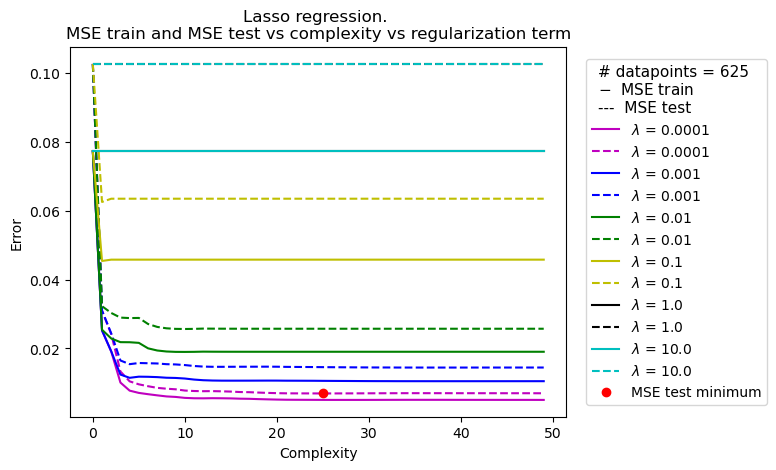

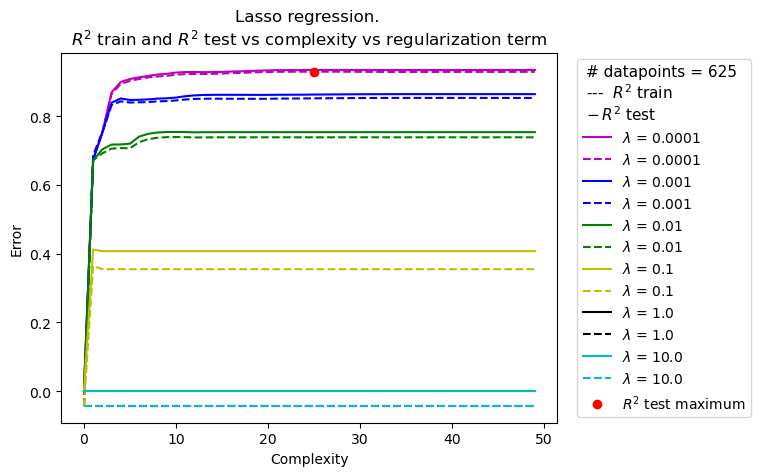

With 625 datapoints, the smallest MSE (test) is 6.9280e-03 and it is obtained with the model with polynomial degree = 25 and regularization term lambda = 1.0000e-04,
while the greatest R-squared is 9.2961e-01 and it is obtained with the model with polynomial degree = 25 and regularization term lambda = 1.0000e-04.


In [26]:
""" LASSO analysis: MSE error analysis with respect to the complexity of the model and the hyperparameter (regularization term) 
                    maxdegree is used to analyze the role of model complexity
                    nlmbs is used to analyze the role of the regularization term """

# Hyperparameter initialization
case = 'lasso'
c_rt_las_maxdegree = 50
c_rt_las_nlmbs = 6
c_rt_las_lmb = np.logspace(-4, 1, c_rt_R_nlmbs)       # Array of regularization terms

c_rt_las_MSE_train = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_MSE_test = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_R2_train = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_R2_test = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_polydegree = np.zeros(c_rt_las_maxdegree)

for i in range(c_rt_las_maxdegree):
    # Computing training and test design matrices
    c_rt_las_design_matrix_train = Design_Matrix_calc(i, x_y_train) 
    c_rt_las_design_matrix_test = Design_Matrix_calc(i, x_y_test)
    #Scaling the data with respect to the training data
    scaled_c_rt_las_design_matrix_train, scaled_c_rt_las_design_matrix_test = data_scaling(c_rt_las_design_matrix_train, c_rt_las_design_matrix_test)
    for j, lmb in enumerate(c_rt_las_lmb):
        # Define the model
        c_rt_RegLasso = linear_model.Lasso(lmb, fit_intercept=True, max_iter = 1000000)
        c_rt_RegLasso.fit(scaled_c_rt_las_design_matrix_train, z_train.ravel())
        # Make the prediction 
        c_rt_las_ztilde = c_rt_RegLasso.predict(scaled_c_rt_las_design_matrix_train)
        c_rt_las_zpredict = c_rt_RegLasso.predict(scaled_c_rt_las_design_matrix_test)
        # Calculation of MSE and R2 of both training and test data sets
        c_rt_las_MSE_train[i,j] = MSE_function(z_train, c_rt_las_ztilde.reshape(len(c_rt_las_ztilde), 1), 'scalar')
        c_rt_las_MSE_test[i,j] = MSE_function(z_test, c_rt_las_zpredict.reshape(len(c_rt_las_zpredict), 1), 'scalar')
        c_rt_las_R2_train[i,j] = R2_function(z_train, c_rt_las_ztilde.reshape(len(c_rt_las_ztilde), 1), 'scalar')
        c_rt_las_R2_test[i,j] = R2_function(z_test, c_rt_las_zpredict.reshape(len(c_rt_las_zpredict), 1), 'scalar')
    c_rt_las_polydegree[i] = i

# Seeking for the smallest test MSE
c_rt_las_MSE_min = np.min(c_rt_las_MSE_test)
c_rt_las_MSE_min_position = np.where(c_rt_las_MSE_test == c_rt_las_MSE_test.min())

# Seeking for the greatest test R2 score
c_rt_las_R2_max = np.max(c_rt_las_R2_test)
c_rt_las_R2_max_position = np.where(c_rt_las_R2_test == c_rt_las_R2_test.max())


# Plot MSE error train and test
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-', 'c-'], ['m--' , 'b--', 'g--', 'y--', 'k--', 'c--']))
for i in range(c_rt_las_nlmbs):
    plt.plot(c_rt_las_polydegree, c_rt_las_MSE_train[:,i], color[0,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_lmb[i]))
    plt.plot(c_rt_las_polydegree, c_rt_las_MSE_test[:,i], color[1,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_lmb[i]))

plt.plot(c_rt_las_MSE_min_position[0][0], c_rt_las_MSE_min, 'ro', label='MSE test minimum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Lasso regression. \n' + 'MSE train and MSE test vs complexity vs regularization term')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n'.format(n_datapoints * n_datapoints) + r'$-$  MSE train' +  '\n' + '---  MSE test ')
plt.show()


# Plot R-squared error train and test
plt.figure(2)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-', 'c-'], ['m--' , 'b--', 'g--', 'y--', 'k--', 'c--']))
for i in range(c_rt_las_nlmbs):
    plt.plot(c_rt_las_polydegree, c_rt_las_R2_train[:,i], color[0,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_lmb[i]))
    plt.plot(c_rt_las_polydegree, c_rt_las_R2_test[:,i], color[1,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_lmb[i]))

plt.plot(c_rt_las_R2_max_position[0][0], c_rt_las_R2_max, 'ro', label=r'$R^2$ test maximum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Lasso regression. \n' + r'$R^2$ train and $R^2$ test vs complexity vs regularization term')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n'.format(n_datapoints * n_datapoints) + r'---  $R^2$ train' +  '\n' + r'$- \, R^2$ test ')
plt.show()

print('With {} datapoints, the smallest MSE (test) is {:.4e} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {:.4e},'.format(n_datapoints*n_datapoints, c_rt_las_MSE_min, c_rt_las_MSE_min_position[0][0], c_rt_las_lmb[c_rt_las_MSE_min_position[1][0]]))
print('while the greatest R-squared is {:.4e} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {:.4e}.'.format(c_rt_las_R2_max, c_rt_las_R2_max_position[0][0], c_rt_las_lmb[c_rt_las_R2_max_position[1][0]]))

# time: 8m 12.3s

2) LASSO analysis: MSE error and R-squared analysis with respect to the regularization term. The degree of the polynomial (model complexity) is now fixed.

/opt/anaconda3/envs/Project_python39/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e-02, tolerance: 3.863e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/Project_python39/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e-02, tolerance: 3.863e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/Project_python39/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

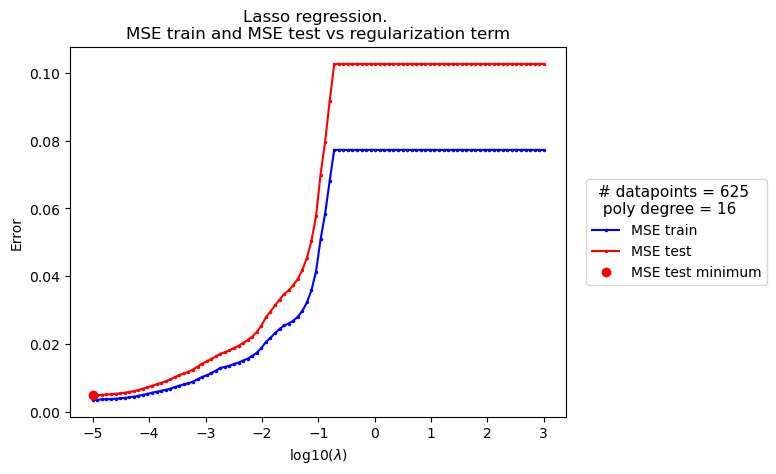

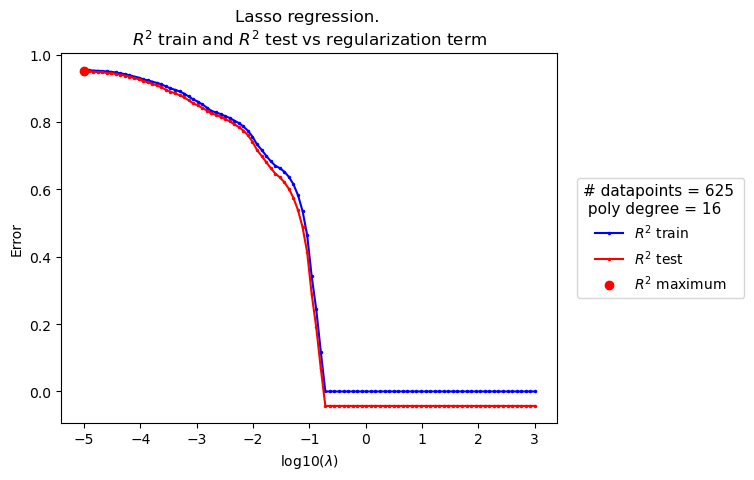

With 625 datapoints and polynomial degree = 16, the smallest mean squared error is 4.8464e-03 and it is obtained with regularization term lambda = 1.0000e-05,
while the greatest R-squared is 9.5076e-01 and it is obtained with regularization term lambda = 1.0000e-05.


In [27]:
""" LASSO analysis: MSE error and R-squared analysis with respect to the regularization term 
                    The degree of the polynomial (model complexity) is now fixed. """

# Hyperparameter initialization
case = 'lasso'
las_nlmbs = 100
las_degree = 16
las_lmb = np.logspace(-5, 3, las_nlmbs)

las_MSE_train = np.zeros(las_nlmbs)
las_MSE_test = np.zeros(las_nlmbs)
las_R2_train = np.zeros(las_nlmbs)
las_R2_test = np.zeros(las_nlmbs)

# Computation of the train and test design matrix 
las_design_matrix_train = Design_Matrix_calc(las_degree, x_y_train) 
las_design_matrix_test = Design_Matrix_calc(las_degree, x_y_test)
# Scaling
scaled_las_design_matrix_train, scaled_las_design_matrix_test = data_scaling(las_design_matrix_train, las_design_matrix_test)


for i, lmb in enumerate(las_lmb):
    # Define the model
    RegLasso = linear_model.Lasso(lmb, fit_intercept=True, max_iter=1000000)
    RegLasso.fit(scaled_las_design_matrix_train, z_train.ravel())
    # Make the prediction 
    las_ztilde = RegLasso.predict(scaled_las_design_matrix_train)
    las_zpredict = RegLasso.predict(scaled_las_design_matrix_test)
    # Calculation of MSE and R2 of both training and test data sets
    las_MSE_train[i] = MSE_function(z_train, las_ztilde.reshape(len(las_ztilde), 1), 'scalar')
    las_MSE_test[i] = MSE_function(z_test, las_zpredict.reshape(len(las_zpredict), 1), 'scalar')
    las_R2_train[i] = R2_function(z_train, las_ztilde.reshape(len(las_ztilde), 1), 'scalar')
    las_R2_test[i] = R2_function(z_test, las_zpredict.reshape(len(las_zpredict), 1), 'scalar')

# Seeking for the smallest test MSE
las_MSE_min = np.min(las_MSE_test)
las_MSE_min_position = np.where(las_MSE_test == las_MSE_test.min())[0]

# Seeking for the greatest test R2 score
las_R2_max = np.max(las_R2_test)
las_R2_max_position = np.where(las_R2_test == las_R2_test.max())[0]

# Plot MSE error train and test
plt.figure(1)
plt.plot(np.log10(las_lmb), las_MSE_train, 'b-o', markersize = 1.5, label='MSE train')
plt.plot(np.log10(las_lmb), las_MSE_test, 'r-o', markersize = 1.5, label='MSE test')
plt.plot(np.log10(las_lmb[las_MSE_min_position]), las_MSE_min, 'ro', label='MSE test minimum', linewidth = 3)
plt.xlabel(r'log10($\lambda$)')
plt.ylabel("Error")
plt.title('Lasso regression. \n' +  'MSE train and MSE test vs regularization term')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n '.format(n_datapoints * n_datapoints) + 'poly degree = {}'.format(las_degree))
plt.show()

# Plot R-squared error train and test
plt.figure(2)
plt.plot(np.log10(las_lmb), las_R2_train, 'b-o', markersize = 1.5, label=r'$R^2$ train')
plt.plot(np.log10(las_lmb), las_R2_test, 'r-o', markersize = 1.5, label=r'$R^2$ test')
plt.plot(np.log10(las_lmb[las_R2_max_position]), las_R2_max, 'ro', label=r'$R^2$ maximum', linewidth = 3)
plt.xlabel(r'log10($\lambda$)')
plt.ylabel("Error")
plt.title('Lasso regression. \n' + r'$R^2$ train and $R^2$ test vs regularization term')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n '.format(n_datapoints * n_datapoints) + 'poly degree = {}'.format(las_degree))
plt.show()


print('With {} datapoints and polynomial degree = {}, the smallest mean squared error is {:.4e} and it is obtained with regularization term lambda = {:.4e},'.format(n_datapoints*n_datapoints, las_degree, las_MSE_min, las_lmb[las_MSE_min_position][0]))
print('while the greatest R-squared is {:.4e} and it is obtained with regularization term lambda = {:.4e}.'.format(las_R2_max, las_lmb[las_R2_max_position][0]))

# time: 5m 22.5s

3)LASSO analysis: BOOTSTRAP and Bias-variance tradeoff with respect to the complexity  of the model and the regularization term.


********************** Regularization parameter: lambda = 0.0001. Model complexity: polynomial of degree 0 **********************
Error:1.026889e-01
Bias^2:1.025496e-01
Var:1.392597e-04
1.026889e-01 >= 1.025496e-01 + 1.392597e-04 = 1.026889e-01
********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 0 **********************
Error:1.027911e-01
Bias^2:1.026275e-01
Var:1.636570e-04
1.027911e-01 >= 1.026275e-01 + 1.636570e-04 = 1.027911e-01
********************** Regularization parameter: lambda = 0.01. Model complexity: polynomial of degree 0 **********************
Error:1.027520e-01
Bias^2:1.025804e-01
Var:1.716134e-04
1.027520e-01 >= 1.025804e-01 + 1.716134e-04 = 1.027520e-01
********************** Regularization parameter: lambda = 0.1. Model complexity: polynomial of degree 0 **********************
Error:1.028345e-01
Bias^2:1.026748e-01
Var:1.597185e-04
1.028345e-01 >= 1.026748e-01 + 1.597185e-04 = 1.028345e-01
********************** Reg

<function matplotlib.pyplot.show(close=None, block=None)>

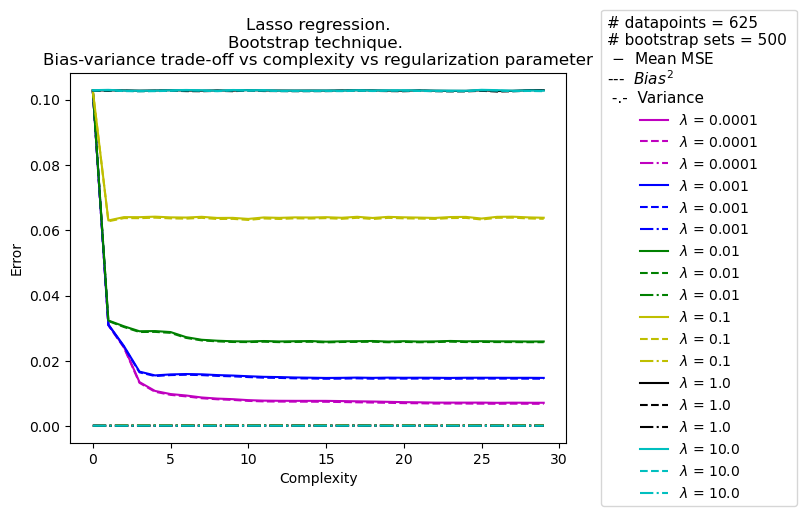

In [5]:
""" LASSO analysis. BOOTSTRAP and Bias-variance tradeoff vs complexity vs the regularization parameter"""

# Hyperparameter initialization
case = 'ridge'
c_rt_las_n_boostraps = 500       # number of bootstrap sets (usually a large number, "almost infinite" to make the method converge)
c_rt_las_maxdegree = 30
c_rt_las_nlmbs = 6
c_rt_las_Bs_lmbs = np.logspace(-4, 1, c_rt_las_nlmbs)       # Array of regularization terms

# The following (m x n_bootstraps) matrices holds the column vectors y_pred for each bootstrap iteration.
c_rt_las_bias = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_variance = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_MSE_mean = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_Bs_polydegree = np.zeros(c_rt_las_maxdegree)


for j in range(c_rt_las_maxdegree):
    for i, lmb in enumerate(c_rt_las_Bs_lmbs):
    # Computing MSE train and test
        c_rt_las_MSE_mean[j,i], c_rt_las_z_pred =  bootstrap_scaled(c_rt_las_n_boostraps, j, x_y_train, z_train, x_y_test, z_test, 'lasso', lmb)
        c_rt_las_bias[j,i] = np.mean( (z_test - np.mean(c_rt_las_z_pred, axis=1, keepdims=True))**2 )
        c_rt_las_variance[j,i] = np.mean( np.var(c_rt_las_z_pred, axis=1, keepdims=True) )
        # Print MSE mean, Bias^2 and variance
        print('********************** Regularization parameter: lambda = {}. Model complexity: polynomial of degree {} **********************'.format(lmb, j))
        print('Error:{:e}'.format(c_rt_las_MSE_mean[j,i]))
        print('Bias^2:{:e}'.format(c_rt_las_bias[j,i]))
        print('Var:{:e}'.format(c_rt_las_variance[j,i]))
        print('{:e} >= {:e} + {:e} = {:e}'.format(c_rt_las_MSE_mean[j,i], c_rt_las_bias[j,i], c_rt_las_variance[j,i], c_rt_las_bias[j,i]+ c_rt_las_variance[j,i]))
    c_rt_las_Bs_polydegree[j] = j


# Plot mean MSE, bias^2 and variance 
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-', 'c-'], ['m--' , 'b--', 'g--', 'y--', 'k--', 'c--'], ['m-.' , 'b-.', 'g-.', 'y-.', 'k-.', 'c-.']))
for i in range(c_rt_las_nlmbs):
    plt.plot(c_rt_las_Bs_polydegree, c_rt_las_MSE_mean[:,i], color[0,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_Bs_lmbs[i]))
    plt.plot(c_rt_las_Bs_polydegree, c_rt_las_bias[:,i], color[1,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_Bs_lmbs[i]))
    plt.plot(c_rt_las_Bs_polydegree, c_rt_las_variance[:,i], color[2,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_Bs_lmbs[i]))
  
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Lasso regression.\n' + 'Bootstrap technique. \n' + 'Bias-variance trade-off vs complexity vs regularization parameter')
plt.legend(bbox_to_anchor=(1.07, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title= '# datapoints = {} \n'.format(n_datapoints * n_datapoints) + '# bootstrap sets = {} \n '.format(c_rt_las_n_boostraps) + r'$-$  Mean MSE ' + '\n' + r'---  $Bias^2$' + '\n' + ' -.-  Variance ')
plt.show


# time: 1245m 17.6s

4) LASSO analysis: Cross-validation and Bias-variance tradeoff. MSE error with respect to the complexity of the model and the regularization term.

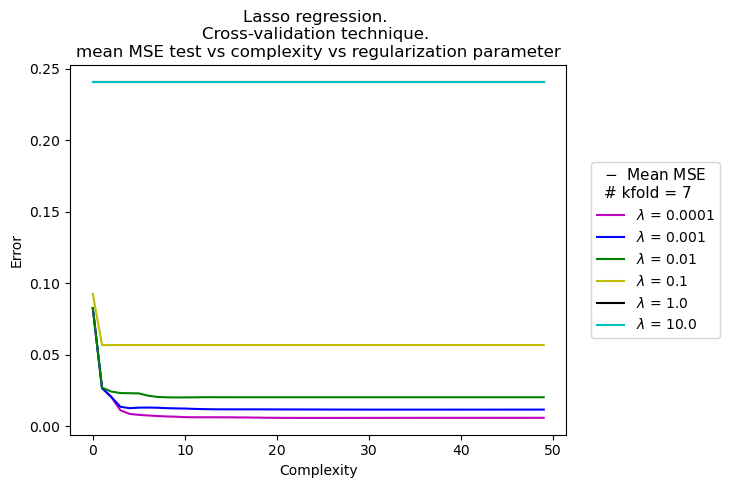

In [29]:
""" LASSO analysis: Cross-validation and Bias-variance tradeoff.
                    MSE error vs complexity vs regularization term """

# Hyperparameter initialization
case = 'lasso'
c_rt_las_Cs_maxdegree = 50             
c_rt_las_Cs_nlmbs = 6
c_rt_las_Cs_lmbs = np.logspace(-4, 1, c_rt_R_nlmbs)       # Array of regularization terms
# Initialize a KFold instance, choose k in [5,10]
c_rt_las_k = 7
c_rt_las_kfold = KFold(n_splits = c_rt_las_k, shuffle=True, random_state= 42)   # shuffle decreases the mean square error  

c_rt_las_KFold_MSE = np.zeros((c_rt_las_Cs_maxdegree, c_rt_las_Cs_nlmbs))
c_rt_las_Cs_polydegree = np.zeros(c_rt_las_Cs_maxdegree)

for j in range(c_rt_las_Cs_maxdegree):
    for i,lmb in enumerate(c_rt_las_Cs_lmbs):
    # Perform the cross-validation to estimate MSE.Function scaled_validation_scaled() scales the features, function validation_scaled() does not scale the features.
        c_rt_las_KFold_MSE[j,i] = cross_validation_scaled(c_rt_las_kfold, c_rt_las_k, x_y, z_noise, j, 'lasso', lmb)
    c_rt_las_Cs_polydegree[j] = j


# Plot mean MSE error test vs complexity vs regularization parameter
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-', 'c-']))
for i in range(c_rt_las_nlmbs):
    plt.plot(c_rt_las_Cs_polydegree, c_rt_las_KFold_MSE[:,i], color[i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_Cs_lmbs[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Lasso regression. \n' +  'Cross-validation technique. \n' + 'mean MSE test vs complexity vs regularization parameter')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title=r'$-$  Mean MSE' + '\n' + '# kfold = {}'.format(c_rt_las_k))
plt.show()

# time: 40m 30.2s

**************************** COMPARISON between OSL, RIDGE and LASSO ****************************

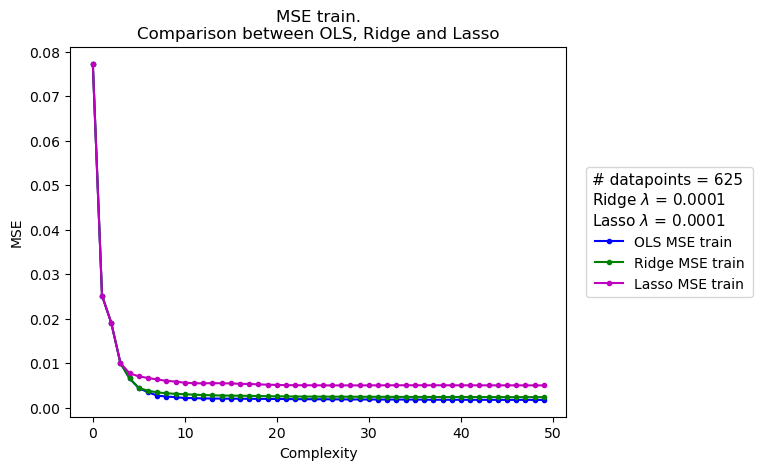

In [30]:
""" Comparison between OLS, Ridge and Lasso of train MSE"""

# OLS
plt.plot(OLS_polydegree, OLS_MSE_train, 'b-o', markersize = 3., label='OLS MSE train')
# RIDGE 
# We choose the smallest lambda used before
plt.plot(c_rt_R_polydegree, c_rt_R_MSE_train[:,0], 'g-o', markersize = 3., label='Ridge MSE train')
# LASSO
# We choose the smallest lambda used before
plt.plot(c_rt_las_polydegree, c_rt_las_MSE_train[:,0], 'm-o', markersize = 3., label='Lasso MSE train')

plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.title('MSE train.\n' + 'Comparison between OLS, Ridge and Lasso')

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n'.format(n_datapoints * n_datapoints) + r'Ridge $\lambda$ = {:.3}'.format(c_rt_R_lmb[0]) + '\n' + r'Lasso $\lambda$ = {:.3}'.format(c_rt_las_lmb[0]))
plt.show()


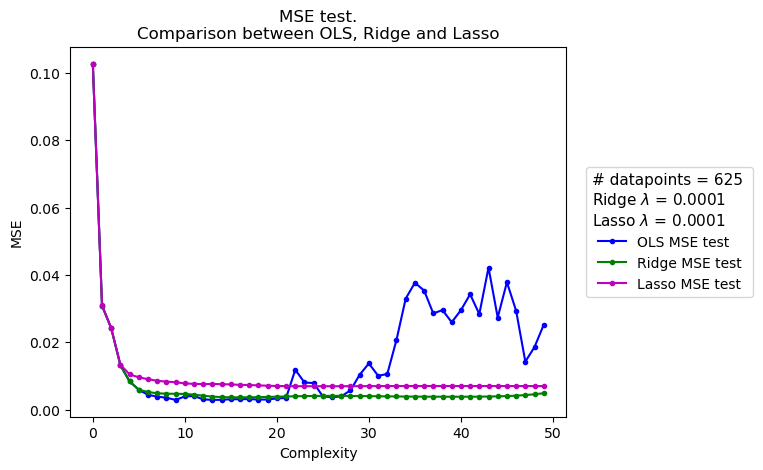

In [31]:
""" Comparison between OLS, Ridge and Lasso of test MSE"""

# OLS
plt.plot(OLS_polydegree, OLS_MSE_test, 'b-o', markersize = 3., label='OLS MSE test')
# RIDGE 
# We choose the smallest lambda used before
plt.plot(c_rt_R_polydegree, c_rt_R_MSE_test[:,0], 'g-o', markersize = 3., label='Ridge MSE test')
# LASSO
# We choose the smallest lambda used before
plt.plot(c_rt_las_polydegree, c_rt_las_MSE_test[:,0], 'm-o', markersize = 3., label='Lasso MSE test')


plt.xlabel("Complexity")
plt.ylabel("MSE")
plt.title('MSE test.\n' + 'Comparison between OLS, Ridge and Lasso')

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title='# datapoints = {} \n'.format(n_datapoints * n_datapoints) + r'Ridge $\lambda$ = {:.3}'.format(c_rt_R_lmb[0]) + '\n' + r'Lasso $\lambda$ = {:.3}'.format(c_rt_las_lmb[0]))
plt.show()